In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train_df = pd.read_csv(r'pre-process-data\processed_train.csv')  # Replace with actual file path
test_df = pd.read_csv(r'pre-process-data\processed_test.csv')    # Replace with actual file path

In [6]:
%pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/150.0 MB 7.6 MB/s eta 0:00:20
   ---------------------------------------- 1.1/150.0 MB 11.1 MB/s eta 0:00:14
    --------------------------------------- 2.3/150.0 MB 16.4 MB/s eta 0:00:09
    --------------------------------------- 3.7/150.0 MB 19.7 MB/s eta 0:00:08
   - -------------------------------------- 4.8/150.0 MB 20.5 MB/s eta 0:00:08
   - -------------------------------------- 5.8/150.0 MB 20.4 MB/s eta 0:00:08
   - -------------------------------------- 7.2/150.0 MB 21.9 MB/s eta 0:00:07
   -- ------------------------------------- 8.4/150.0 MB 23.4 MB/s eta 0:00:07
   -- ------------------------------------- 9.8/150.0 MB 23.2 MB/s eta 0:00:07
   -- ------------------------------------- 10.9/150.0 MB 26.2 MB/s eta 0:00:06
   --- ------------------------------------ 12.1/150.0 MB 27.3 MB/s eta 0:00:06
   --- ------------------------------------ 13.3/150.0 MB 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
test_df.isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
               ..
TotalPorchSF    0
HasPool         0
HasGarage       0
HasFireplace    0
QualityScore    0
Length: 82, dtype: int64

Missing in train:
 MSSubClass     0
3SsnPorch      0
OpenPorchSF    0
WoodDeckSF     0
PavedDrive     0
dtype: int64
Missing in test:
 BsmtHalfBath      2
BsmtFullBath      2
TotalBathrooms    2
BsmtFinSF2        1
GarageCars        1
dtype: int64


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# ------------------ Load Data ------------------
train_df = pd.read_csv(r'pre-process-data\processed_train.csv')
test_df = pd.read_csv(r'pre-process-data\processed_test.csv')

# ------------------ Target and Features ------------------
target_column = 'LogSalePrice'

# Drop target columns from training features
X_train = train_df.drop(columns=[target_column, 'SalePrice'])
y_train = train_df[target_column]

# Copy test set
X_test = test_df.copy()

# ------------------ Ensure Only Numeric Features ------------------
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# ------------------ Handle Missing Values ------------------
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())  # Use training stats for imputation

# ------------------ Linear Regression ------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds_log = lr_model.predict(X_test)
lr_preds = np.expm1(lr_preds_log)

# ------------------ Random Forest ------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds_log = rf_model.predict(X_test)
rf_preds = np.expm1(rf_preds_log)

# ------------------ XGBoost ------------------
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds_log = xgb_model.predict(X_test)
xgb_preds = np.expm1(xgb_preds_log)

# ------------------ Output: In-Memory Only ------------------
# print("✅ Predictions generated (not saved).")
# print(f"Linear Regression prediction sample: {lr_preds[:5]}")
# print(f"Random Forest prediction sample:    {rf_preds[:5]}")
# print(f"XGBoost prediction sample:          {xgb_preds[:5]}")

#### Model Evaluation

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# ------------------ Load Data ------------------
train_df = pd.read_csv(r'pre-process-data\processed_train.csv')
test_df = pd.read_csv(r'pre-process-data\processed_test.csv')

# ------------------ Define Target and Features ------------------
target_column = 'LogSalePrice'
X_train = train_df.drop(columns=['SalePrice', target_column])
y_train = train_df[target_column]

# ------------------ Prepare Test Data ------------------
X_test = test_df.select_dtypes(include=[np.number])
X_train = X_train.select_dtypes(include=[np.number])  # ensure consistent columns

# Fill missing values using training set stats
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

# ------------------ Train and Predict ------------------

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds_log = lr_model.predict(X_test)
lr_preds = np.expm1(lr_preds_log)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds_log = rf_model.predict(X_test)
rf_preds = np.expm1(rf_preds_log)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds_log = xgb_model.predict(X_test)
xgb_preds = np.expm1(xgb_preds_log)

# ------------------ View Prediction Samples ------------------
print("✅ Predictions generated.")
print("\nLinear Regression sample:", lr_preds[:5])
print("Random Forest sample:    ", rf_preds[:5])
print("XGBoost sample:          ", xgb_preds[:5])

✅ Predictions generated.

Linear Regression sample: [120979.85518946 161830.64915784 176485.97117895 197734.04100065
 178973.05054474]
Random Forest sample:     [124598.39633238 167704.74471692 179088.02599249 185439.07682296
 188253.12889531]
XGBoost sample:           [125136.37 169547.7  180842.58 186528.19 179478.88]


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}



🧠 Top 10 Features selected from Random Forest:
 ['TotalSF', 'QualityScore', 'ExterQual', 'Age', 'TotalBathrooms', 'RemodAge', 'GrLivArea', 'LotArea', 'BsmtFinSF1', 'KitchenQual']

📊 Model Performance on Validation Set:
Linear Regression → RMSE: 20,689.84, R²: 0.9059
Random Forest → RMSE: 21,376.25, R²: 0.8996
XGBoost → RMSE: 22,515.77, R²: 0.8886


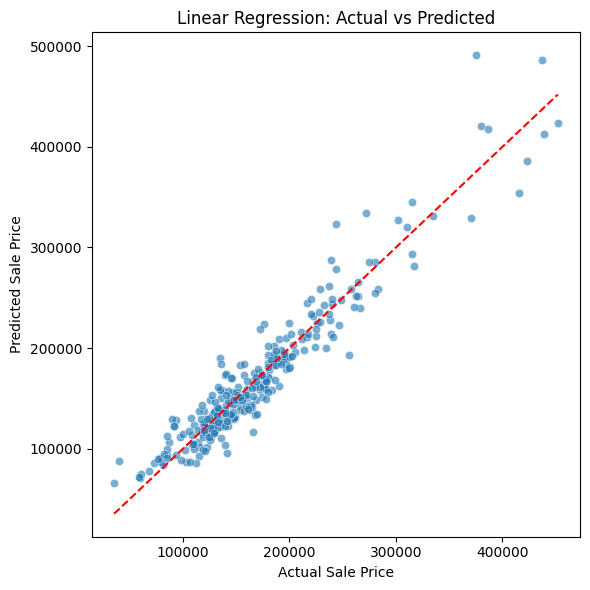

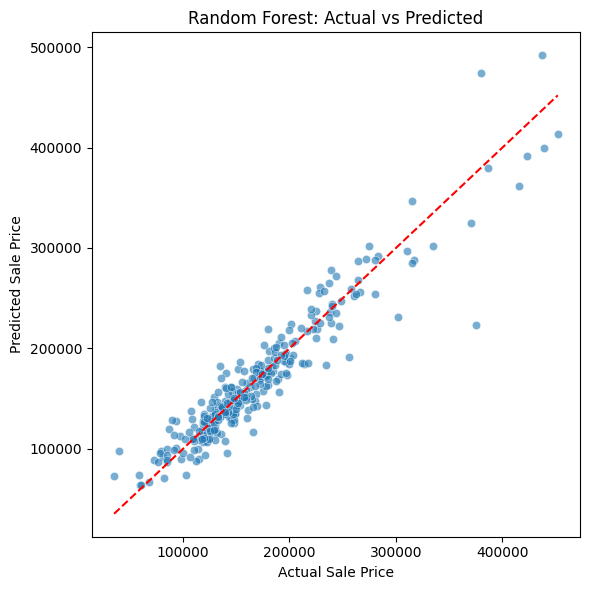

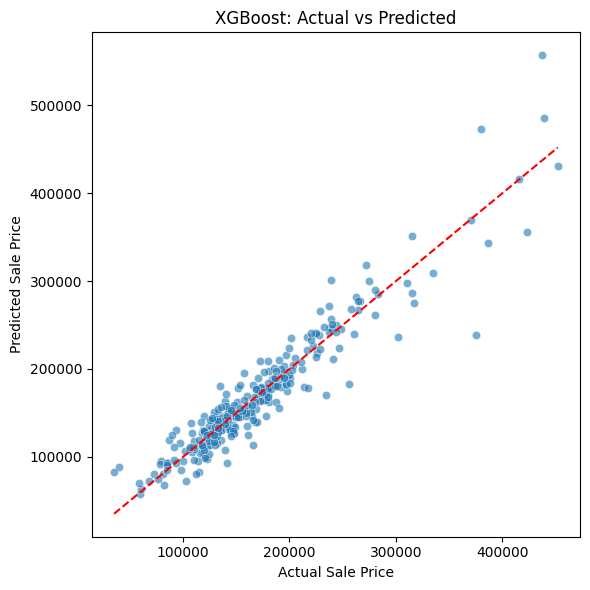

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ------------------ Load Data ------------------
df = pd.read_csv(r'pre-process-data/processed_train.csv')

# ------------------ Target and Full Feature Set ------------------
target_column = 'LogSalePrice'
X = df.drop(columns=['SalePrice', target_column])
y = df[target_column]

# Use only numeric features
X = X.select_dtypes(include=[np.number])

# Fill missing values
X = X.fillna(X.median())

# ------------------ Train/Test Split ------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------ Step 1: Baseline Random Forest ------------------
rf_baseline = RandomForestRegressor(n_estimators=100, random_state=42)
rf_baseline.fit(X_train, y_train)

# ------------------ Step 2: Get Top N Features ------------------
importances = pd.Series(rf_baseline.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Automatically pick top N features (e.g., top 10)
top_n = 10
top_features = importances.head(top_n).index.tolist()
print(f"\n🧠 Top {top_n} Features selected from Random Forest:\n", top_features)

# ------------------ Step 3: Retrain Using Top Features Only ------------------
X_train_top = X_train[top_features]
X_val_top = X_val[top_features]

# ------------------ Step 4: Train Models ------------------
lr_model = LinearRegression().fit(X_train_top, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_top, y_train)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42).fit(X_train_top, y_train)

# ------------------ Step 5: Evaluation ------------------
def evaluate_model(name, model):
    preds_log = model.predict(X_val_top)
    preds_real = np.expm1(preds_log)
    y_real = np.expm1(y_val)
    rmse = mean_squared_error(y_real, preds_real)**0.5
    r2 = r2_score(y_real, preds_real)
    print(f"{name} → RMSE: {rmse:,.2f}, R²: {r2:.4f}")
    return preds_real

print("\n📊 Model Performance on Validation Set:")
lr_preds = evaluate_model("Linear Regression", lr_model)
rf_preds = evaluate_model("Random Forest", rf_model)
xgb_preds = evaluate_model("XGBoost", xgb_model)

# ------------------ Step 6: Actual vs Predicted Plot ------------------
def plot_preds(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color='red')
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_preds(np.expm1(y_val), lr_preds, "Linear Regression: Actual vs Predicted")
plot_preds(np.expm1(y_val), rf_preds, "Random Forest: Actual vs Predicted")
plot_preds(np.expm1(y_val), xgb_preds, "XGBoost: Actual vs Predicted")